___

<a href='http://www.pieriandata.com'>http://www.pieriandata.com</a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Keras-RL DQN Exercise


In this exercise you are going to implement your first keras-rl agent based on the **Acrobot** environment (https://gym.openai.com/envs/Acrobot-v1/) <br />
The goal of this environment is to maneuver the robot arm upwards above the line with as little steps as possible

**TASK: Import necessary libraries** <br />

In [2]:
import time
import numpy as np
import random
import gym
import matplotlib
import matplotlib.pyplot as plt

from gym import logger as gymlogger
from IPython.display import clear_output

gymlogger.set_level(40) # error only
%matplotlib inline

In [3]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [4]:
tf.__version__

'2.1.0'

**TASK: Create the environment** <br />
The name is: *Acrobot-v1*

In [5]:
env_name = "Acrobot-v1"
env = gym.make(env_name)

In [6]:
from IPython.display import clear_output

def show_environment(array):
    plt.axis("off")
    plt.imshow(environment)
    plt.show()

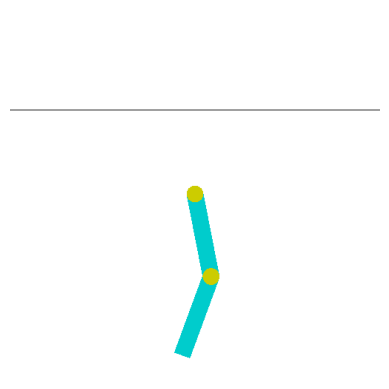

In [7]:
env.reset()
for step in range(50):
  environment = env.render(mode="rgb_array")
  show_environment(environment)
  action = env.action_space.sample()
  env.step(action)
  clear_output(wait=True)
env.close()

In [8]:
num_actions = env.action_space.n
num_observations = env.observation_space.shape
print(f"Action Space: {env.action_space.n}")
print(f"Observation Space: {num_observations}")

assert num_actions == 3 and num_observations == (6,) , "Wrong environment!"

Action Space: 3
Observation Space: (6,)


**TASK: Create the Neural Network for your Deep-Q-Agent** <br />
Take a look at the size of the action space and the size of the observation space.
You are free to chose any architecture you want! <br />
Hint: It already works with three layers, each having 64 neurons.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=(1,) + num_observations))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(num_actions))
model.add(Activation("linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_6 (Activation)    (None, 64)               

**TASK: Initialize the circular buffer**<br />
Make sure you set the limit appropriately (50000 works well)

In [15]:
from rl.memory import SequentialMemory

memory = SequentialMemory(limit=80_000, window_length=1)

**TASK: Use the epsilon greedy action selection strategy with *decaying* epsilon**

In [16]:
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr="eps",
                              value_min=0.1,
                              value_max=1.0,
                              value_test=0.05,
                              nb_steps=100_000)

**TASK: Create the DQNAgent** <br />
Feel free to play with the nb_steps_warump, target_model_update, batch_size and gamma parameters. <br />
Hint:<br />
You can try *nb_steps_warmup*=1000, *target_model_update*=1000, *batch_size*=32 and *gamma*=0.99 as a first guess

In [17]:
from rl.agents.dqn import DQNAgent

dqn = DQNAgent(model=model, nb_actions=num_actions,
               memory=memory, nb_steps_warmup=1000,
               target_model_update=1000, batch_size=64,
               gamma=0.99, policy=policy)

**TASK: Compile the model** <br />
Feel free to explore the effects of different optimizers and learning rates.
You can try Adam with a learning rate of 1e-3 as a first guess 

In [18]:
dqn.compile(Adam(learning_rate=1e-3), metrics=["mae"])

**TASK: Fit the model** <br />
150,000 steps should be a very good starting point

In [19]:
dqn.fit(env, nb_steps=100_000, visualize=False, verbose=2)

Training for 100000 steps ...
   500/100000: episode: 1, duration: 0.362s, episode steps: 500, steps per second: 1382, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.022 [0.000, 2.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1000/100000: episode: 2, duration: 0.304s, episode steps: 500, steps per second: 1644, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.016 [0.000, 2.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1500/100000: episode: 3, duration: 4.740s, episode steps: 500, steps per second: 105, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.958 [0.000, 2.000],  loss: 0.009523, mae: 0.549917, mean_q: -0.757981, mean_eps: 0.988750
  2000/100000: episode: 4, duration: 4.186s, episode steps: 500, steps per second: 119, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.902 [0.000, 2.000],  loss: 0.000338, mae: 0.545162, mean_q: -0.787797, mean_eps:

 16478/100000: episode: 33, duration: 4.331s, episode steps: 500, steps per second: 115, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.010 [0.000, 2.000],  loss: 0.222169, mae: 10.899908, mean_q: -16.101049, mean_eps: 0.853953
 16978/100000: episode: 34, duration: 4.268s, episode steps: 500, steps per second: 117, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.078 [0.000, 2.000],  loss: 0.194304, mae: 10.916436, mean_q: -16.152262, mean_eps: 0.849452
 17478/100000: episode: 35, duration: 4.282s, episode steps: 500, steps per second: 117, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.020 [0.000, 2.000],  loss: 0.222930, mae: 11.346473, mean_q: -16.759635, mean_eps: 0.844952
 17978/100000: episode: 36, duration: 4.261s, episode steps: 500, steps per second: 117, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 1.014 [0.000, 2.000],  loss: 0.227171, mae: 11.354349,

 30363/100000: episode: 65, duration: 3.729s, episode steps: 420, steps per second: 113, episode reward: -419.000, mean reward: -0.998 [-1.000,  0.000], mean action: 0.819 [0.000, 2.000],  loss: 0.410889, mae: 16.100549, mean_q: -23.672829, mean_eps: 0.728627
 30672/100000: episode: 66, duration: 2.715s, episode steps: 309, steps per second: 114, episode reward: -308.000, mean reward: -0.997 [-1.000,  0.000], mean action: 0.887 [0.000, 2.000],  loss: 0.507344, mae: 16.078592, mean_q: -23.604595, mean_eps: 0.725347
 31172/100000: episode: 67, duration: 4.306s, episode steps: 500, steps per second: 116, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.830 [0.000, 2.000],  loss: 0.518307, mae: 16.184088, mean_q: -23.767414, mean_eps: 0.721707
 31405/100000: episode: 68, duration: 2.005s, episode steps: 233, steps per second: 116, episode reward: -232.000, mean reward: -0.996 [-1.000,  0.000], mean action: 0.833 [0.000, 2.000],  loss: 0.431935, mae: 16.318621,

 40454/100000: episode: 97, duration: 2.266s, episode steps: 260, steps per second: 115, episode reward: -259.000, mean reward: -0.996 [-1.000,  0.000], mean action: 0.800 [0.000, 2.000],  loss: 0.701624, mae: 18.724489, mean_q: -27.539473, mean_eps: 0.637089
 40800/100000: episode: 98, duration: 3.027s, episode steps: 346, steps per second: 114, episode reward: -345.000, mean reward: -0.997 [-1.000,  0.000], mean action: 0.853 [0.000, 2.000],  loss: 0.659980, mae: 18.734180, mean_q: -27.556273, mean_eps: 0.634362
 41035/100000: episode: 99, duration: 2.053s, episode steps: 235, steps per second: 114, episode reward: -234.000, mean reward: -0.996 [-1.000,  0.000], mean action: 0.843 [0.000, 2.000],  loss: 0.567398, mae: 18.789536, mean_q: -27.627231, mean_eps: 0.631747
 41535/100000: episode: 100, duration: 4.334s, episode steps: 500, steps per second: 115, episode reward: -500.000, mean reward: -1.000 [-1.000, -1.000], mean action: 0.980 [0.000, 2.000],  loss: 0.470516, mae: 19.010123

 49065/100000: episode: 129, duration: 2.302s, episode steps: 270, steps per second: 117, episode reward: -269.000, mean reward: -0.996 [-1.000,  0.000], mean action: 1.122 [0.000, 2.000],  loss: 0.666071, mae: 20.292625, mean_q: -29.791563, mean_eps: 0.559635
 49263/100000: episode: 130, duration: 1.702s, episode steps: 198, steps per second: 116, episode reward: -197.000, mean reward: -0.995 [-1.000,  0.000], mean action: 1.111 [0.000, 2.000],  loss: 0.479537, mae: 20.529947, mean_q: -30.165320, mean_eps: 0.557528
 49461/100000: episode: 131, duration: 1.723s, episode steps: 198, steps per second: 115, episode reward: -197.000, mean reward: -0.995 [-1.000,  0.000], mean action: 0.995 [0.000, 2.000],  loss: 0.746113, mae: 20.549974, mean_q: -30.169820, mean_eps: 0.555747
 49710/100000: episode: 132, duration: 2.123s, episode steps: 249, steps per second: 117, episode reward: -248.000, mean reward: -0.996 [-1.000,  0.000], mean action: 1.032 [0.000, 2.000],  loss: 0.636598, mae: 20.461

 55475/100000: episode: 161, duration: 1.061s, episode steps: 119, steps per second: 112, episode reward: -118.000, mean reward: -0.992 [-1.000,  0.000], mean action: 0.857 [0.000, 2.000],  loss: 0.701597, mae: 21.422847, mean_q: -31.476859, mean_eps: 0.501265
 55719/100000: episode: 162, duration: 2.117s, episode steps: 244, steps per second: 115, episode reward: -243.000, mean reward: -0.996 [-1.000,  0.000], mean action: 0.984 [0.000, 2.000],  loss: 0.801947, mae: 21.389848, mean_q: -31.413033, mean_eps: 0.499632
 55893/100000: episode: 163, duration: 1.509s, episode steps: 174, steps per second: 115, episode reward: -173.000, mean reward: -0.994 [-1.000,  0.000], mean action: 0.937 [0.000, 2.000],  loss: 0.428362, mae: 21.293401, mean_q: -31.311054, mean_eps: 0.497750
 56066/100000: episode: 164, duration: 1.532s, episode steps: 173, steps per second: 113, episode reward: -172.000, mean reward: -0.994 [-1.000,  0.000], mean action: 1.000 [0.000, 2.000],  loss: 0.521568, mae: 21.438

 60993/100000: episode: 193, duration: 1.742s, episode steps: 194, steps per second: 111, episode reward: -193.000, mean reward: -0.995 [-1.000,  0.000], mean action: 0.990 [0.000, 2.000],  loss: 0.539822, mae: 22.291902, mean_q: -32.727237, mean_eps: 0.451941
 61156/100000: episode: 194, duration: 1.499s, episode steps: 163, steps per second: 109, episode reward: -162.000, mean reward: -0.994 [-1.000,  0.000], mean action: 1.074 [0.000, 2.000],  loss: 0.560179, mae: 22.453977, mean_q: -32.916223, mean_eps: 0.450334
 61322/100000: episode: 195, duration: 1.518s, episode steps: 166, steps per second: 109, episode reward: -165.000, mean reward: -0.994 [-1.000,  0.000], mean action: 1.024 [0.000, 2.000],  loss: 0.365585, mae: 22.430430, mean_q: -32.948908, mean_eps: 0.448854
 61446/100000: episode: 196, duration: 1.099s, episode steps: 124, steps per second: 113, episode reward: -123.000, mean reward: -0.992 [-1.000,  0.000], mean action: 1.024 [0.000, 2.000],  loss: 0.485877, mae: 22.421

 65669/100000: episode: 225, duration: 0.876s, episode steps:  88, steps per second: 100, episode reward: -87.000, mean reward: -0.989 [-1.000,  0.000], mean action: 0.977 [0.000, 2.000],  loss: 0.396478, mae: 22.625508, mean_q: -33.210300, mean_eps: 0.409380
 65802/100000: episode: 226, duration: 1.267s, episode steps: 133, steps per second: 105, episode reward: -132.000, mean reward: -0.992 [-1.000,  0.000], mean action: 1.045 [0.000, 2.000],  loss: 0.511719, mae: 22.794805, mean_q: -33.471420, mean_eps: 0.408385
 65894/100000: episode: 227, duration: 0.863s, episode steps:  92, steps per second: 107, episode reward: -91.000, mean reward: -0.989 [-1.000,  0.000], mean action: 1.022 [0.000, 2.000],  loss: 0.403099, mae: 22.822347, mean_q: -33.549932, mean_eps: 0.407373
 66061/100000: episode: 228, duration: 1.625s, episode steps: 167, steps per second: 103, episode reward: -166.000, mean reward: -0.994 [-1.000,  0.000], mean action: 1.000 [0.000, 2.000],  loss: 0.636221, mae: 22.82956

 70263/100000: episode: 257, duration: 1.143s, episode steps: 119, steps per second: 104, episode reward: -118.000, mean reward: -0.992 [-1.000,  0.000], mean action: 1.092 [0.000, 2.000],  loss: 0.803117, mae: 23.649308, mean_q: -34.659685, mean_eps: 0.368173
 70398/100000: episode: 258, duration: 1.307s, episode steps: 135, steps per second: 103, episode reward: -134.000, mean reward: -0.993 [-1.000,  0.000], mean action: 1.089 [0.000, 2.000],  loss: 0.689521, mae: 23.657481, mean_q: -34.680564, mean_eps: 0.367030
 70544/100000: episode: 259, duration: 1.410s, episode steps: 146, steps per second: 104, episode reward: -145.000, mean reward: -0.993 [-1.000,  0.000], mean action: 1.014 [0.000, 2.000],  loss: 0.711167, mae: 23.508777, mean_q: -34.449865, mean_eps: 0.365766
 70690/100000: episode: 260, duration: 1.405s, episode steps: 146, steps per second: 104, episode reward: -145.000, mean reward: -0.993 [-1.000,  0.000], mean action: 0.938 [0.000, 2.000],  loss: 0.504290, mae: 23.625

 74582/100000: episode: 289, duration: 1.333s, episode steps: 142, steps per second: 107, episode reward: -141.000, mean reward: -0.993 [-1.000,  0.000], mean action: 0.979 [0.000, 2.000],  loss: 1.102666, mae: 23.676752, mean_q: -34.647054, mean_eps: 0.329406
 74695/100000: episode: 290, duration: 1.089s, episode steps: 113, steps per second: 104, episode reward: -112.000, mean reward: -0.991 [-1.000,  0.000], mean action: 0.885 [0.000, 2.000],  loss: 0.621460, mae: 23.692871, mean_q: -34.694265, mean_eps: 0.328258
 74808/100000: episode: 291, duration: 1.033s, episode steps: 113, steps per second: 109, episode reward: -112.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.027 [0.000, 2.000],  loss: 0.596807, mae: 23.494422, mean_q: -34.402690, mean_eps: 0.327241
 74917/100000: episode: 292, duration: 0.999s, episode steps: 109, steps per second: 109, episode reward: -108.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.000 [0.000, 2.000],  loss: 0.617792, mae: 23.638

 78356/100000: episode: 321, duration: 1.293s, episode steps: 136, steps per second: 105, episode reward: -135.000, mean reward: -0.993 [-1.000,  0.000], mean action: 1.015 [0.000, 2.000],  loss: 0.549865, mae: 23.651012, mean_q: -34.580557, mean_eps: 0.295412
 78465/100000: episode: 322, duration: 0.989s, episode steps: 109, steps per second: 110, episode reward: -108.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.064 [0.000, 2.000],  loss: 0.574060, mae: 23.557056, mean_q: -34.419607, mean_eps: 0.294310
 78582/100000: episode: 323, duration: 1.066s, episode steps: 117, steps per second: 110, episode reward: -116.000, mean reward: -0.991 [-1.000,  0.000], mean action: 0.863 [0.000, 2.000],  loss: 0.772263, mae: 23.636330, mean_q: -34.513107, mean_eps: 0.293293
 78755/100000: episode: 324, duration: 1.578s, episode steps: 173, steps per second: 110, episode reward: -172.000, mean reward: -0.994 [-1.000,  0.000], mean action: 0.890 [0.000, 2.000],  loss: 0.994409, mae: 23.510

 81924/100000: episode: 353, duration: 0.812s, episode steps:  89, steps per second: 110, episode reward: -88.000, mean reward: -0.989 [-1.000,  0.000], mean action: 0.978 [0.000, 2.000],  loss: 0.601118, mae: 23.538307, mean_q: -34.447780, mean_eps: 0.263089
 82020/100000: episode: 354, duration: 0.871s, episode steps:  96, steps per second: 110, episode reward: -95.000, mean reward: -0.990 [-1.000,  0.000], mean action: 0.927 [0.000, 2.000],  loss: 0.751520, mae: 23.496627, mean_q: -34.366556, mean_eps: 0.262256
 82111/100000: episode: 355, duration: 0.850s, episode steps:  91, steps per second: 107, episode reward: -90.000, mean reward: -0.989 [-1.000,  0.000], mean action: 0.868 [0.000, 2.000],  loss: 0.820904, mae: 23.563607, mean_q: -34.361670, mean_eps: 0.261415
 82205/100000: episode: 356, duration: 0.861s, episode steps:  94, steps per second: 109, episode reward: -93.000, mean reward: -0.989 [-1.000,  0.000], mean action: 1.032 [0.000, 2.000],  loss: 0.804194, mae: 23.271504,

 85146/100000: episode: 385, duration: 0.858s, episode steps:  92, steps per second: 107, episode reward: -91.000, mean reward: -0.989 [-1.000,  0.000], mean action: 1.087 [0.000, 2.000],  loss: 0.973968, mae: 23.432453, mean_q: -34.143557, mean_eps: 0.234105
 85252/100000: episode: 386, duration: 0.974s, episode steps: 106, steps per second: 109, episode reward: -105.000, mean reward: -0.991 [-1.000,  0.000], mean action: 0.830 [0.000, 2.000],  loss: 0.539356, mae: 23.460287, mean_q: -34.232323, mean_eps: 0.233213
 85337/100000: episode: 387, duration: 0.878s, episode steps:  85, steps per second:  97, episode reward: -84.000, mean reward: -0.988 [-1.000,  0.000], mean action: 1.141 [0.000, 2.000],  loss: 0.612890, mae: 23.482287, mean_q: -34.274154, mean_eps: 0.232354
 85445/100000: episode: 388, duration: 0.989s, episode steps: 108, steps per second: 109, episode reward: -107.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.028 [0.000, 2.000],  loss: 0.904497, mae: 23.23822

 88354/100000: episode: 417, duration: 0.700s, episode steps:  76, steps per second: 109, episode reward: -75.000, mean reward: -0.987 [-1.000,  0.000], mean action: 0.947 [0.000, 2.000],  loss: 0.550958, mae: 23.271713, mean_q: -33.964397, mean_eps: 0.205160
 88478/100000: episode: 418, duration: 1.122s, episode steps: 124, steps per second: 110, episode reward: -123.000, mean reward: -0.992 [-1.000,  0.000], mean action: 0.919 [0.000, 2.000],  loss: 0.833453, mae: 23.316612, mean_q: -33.986231, mean_eps: 0.204261
 88589/100000: episode: 419, duration: 1.012s, episode steps: 111, steps per second: 110, episode reward: -110.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.072 [0.000, 2.000],  loss: 0.685117, mae: 23.115153, mean_q: -33.711527, mean_eps: 0.203203
 88729/100000: episode: 420, duration: 1.280s, episode steps: 140, steps per second: 109, episode reward: -139.000, mean reward: -0.993 [-1.000,  0.000], mean action: 1.107 [0.000, 2.000],  loss: 0.720339, mae: 23.2858

 91601/100000: episode: 449, duration: 0.907s, episode steps:  98, steps per second: 108, episode reward: -97.000, mean reward: -0.990 [-1.000,  0.000], mean action: 0.908 [0.000, 2.000],  loss: 0.578705, mae: 23.497506, mean_q: -34.243254, mean_eps: 0.176037
 91691/100000: episode: 450, duration: 0.831s, episode steps:  90, steps per second: 108, episode reward: -89.000, mean reward: -0.989 [-1.000,  0.000], mean action: 1.089 [0.000, 2.000],  loss: 0.655232, mae: 23.432426, mean_q: -34.146562, mean_eps: 0.175190
 91811/100000: episode: 451, duration: 1.090s, episode steps: 120, steps per second: 110, episode reward: -119.000, mean reward: -0.992 [-1.000,  0.000], mean action: 0.925 [0.000, 2.000],  loss: 0.750221, mae: 23.185668, mean_q: -33.740194, mean_eps: 0.174245
 91913/100000: episode: 452, duration: 1.016s, episode steps: 102, steps per second: 100, episode reward: -101.000, mean reward: -0.990 [-1.000,  0.000], mean action: 1.020 [0.000, 2.000],  loss: 0.842810, mae: 23.37336

 94758/100000: episode: 481, duration: 0.870s, episode steps:  96, steps per second: 110, episode reward: -95.000, mean reward: -0.990 [-1.000,  0.000], mean action: 0.917 [0.000, 2.000],  loss: 0.617019, mae: 23.364202, mean_q: -33.997123, mean_eps: 0.147614
 94873/100000: episode: 482, duration: 1.048s, episode steps: 115, steps per second: 110, episode reward: -114.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.096 [0.000, 2.000],  loss: 0.767955, mae: 23.325846, mean_q: -33.976205, mean_eps: 0.146665
 94984/100000: episode: 483, duration: 1.009s, episode steps: 111, steps per second: 110, episode reward: -110.000, mean reward: -0.991 [-1.000,  0.000], mean action: 0.955 [0.000, 2.000],  loss: 0.527873, mae: 23.438899, mean_q: -34.152283, mean_eps: 0.145648
 95098/100000: episode: 484, duration: 1.013s, episode steps: 114, steps per second: 113, episode reward: -113.000, mean reward: -0.991 [-1.000,  0.000], mean action: 0.921 [0.000, 2.000],  loss: 0.660788, mae: 23.3067

 97873/100000: episode: 513, duration: 1.008s, episode steps: 111, steps per second: 110, episode reward: -110.000, mean reward: -0.991 [-1.000,  0.000], mean action: 1.036 [0.000, 2.000],  loss: 0.616266, mae: 23.320604, mean_q: -33.931726, mean_eps: 0.119647
 97971/100000: episode: 514, duration: 0.896s, episode steps:  98, steps per second: 109, episode reward: -97.000, mean reward: -0.990 [-1.000,  0.000], mean action: 1.143 [0.000, 2.000],  loss: 0.537007, mae: 23.022543, mean_q: -33.466717, mean_eps: 0.118706
 98048/100000: episode: 515, duration: 0.703s, episode steps:  77, steps per second: 110, episode reward: -76.000, mean reward: -0.987 [-1.000,  0.000], mean action: 0.935 [0.000, 2.000],  loss: 0.698841, mae: 23.059611, mean_q: -33.508925, mean_eps: 0.117919
 98148/100000: episode: 516, duration: 0.898s, episode steps: 100, steps per second: 111, episode reward: -99.000, mean reward: -0.990 [-1.000,  0.000], mean action: 1.040 [0.000, 2.000],  loss: 0.760742, mae: 22.885742

**TASK: Evaluate the model**

In [20]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: -77.000, steps: 78
Episode 2: reward: -69.000, steps: 70
Episode 3: reward: -87.000, steps: 88
Episode 4: reward: -77.000, steps: 78
Episode 5: reward: -77.000, steps: 78
